In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
wine_data = np.loadtxt("wine_train.csv", dtype=np.float, delimiter=",")
wine_xy=wine_data[:,:2]
wine_label=wine_data[:,-1]

In [3]:
def One_vs_Rest(xy_data,label,classnumber):
    yes_count=list(label).count(classnumber)
    no_count=len(label)-yes_count
    sample=np.array([[float(0)]*2 for _ in range(2)])
    for i in range(len(xy_data)):
        if label[i]==classnumber:
            sample[0]=sample[0]+xy_data[i]
        else:
            sample[1]=sample[1]+xy_data[i]
    sample[0] = sample[0]/yes_count
    sample[1]=sample[1]/no_count
    return sample

In [4]:
mean_12=One_vs_Rest(wine_xy,wine_label,3)
mean_13=One_vs_Rest(wine_xy,wine_label,2)
mean_23=One_vs_Rest(wine_xy,wine_label,1)

In [5]:
#calculate the distance between each point with two classes
dist_12 = cdist(wine_xy, mean_12)
pred_label_12 = np.argmin(dist_12, axis=1)
dist_13 = cdist(wine_xy, mean_13)
pred_label_13 = np.argmin(dist_13, axis=1)
dist_23 = cdist(wine_xy, mean_23)
pred_label_23 = np.argmin(dist_23, axis=1)

pred_label=np.array([0]*len(pred_label_12))
#print pred_label
for i in range(len(pred_label_12)):
    if pred_label_12[i] and pred_label_13[i] and not pred_label_23[i]:
        pred_label[i]=1
    elif pred_label_12[i] and pred_label_23[i] and not pred_label_13[i]:
        pred_label[i]=2
    elif pred_label_13[i] and pred_label_23[i] and not pred_label_12[i]:
        pred_label[i]=3
#print pred_label

In [6]:
label_count = 0
for i in range(len(pred_label)):
    if pred_label[i]==wine_label[i]:
        label_count+=1
percent = label_count/float(len(pred_label))*100
print ("Training Classification accuracy is %s%%")%percent

Training Classification accuracy is 74.1573033708%


In [7]:
wine_test_data = np.loadtxt("wine_test.csv", dtype=np.float, delimiter=",")
wine_test_xy=wine_test_data[:,:2]
wine_test_label=wine_test_data[:,-1]
#print wine_test_label
pred_test_label=np.array([0]*len(wine_test_label))
dist_12 = cdist(wine_test_xy, mean_12)
pred_test_label_12 = np.argmin(dist_12, axis=1)
dist_13 = cdist(wine_test_xy, mean_13)
pred_test_label_13 = np.argmin(dist_13, axis=1)
dist_23 = cdist(wine_test_xy, mean_23)
pred_test_label_23 = np.argmin(dist_23, axis=1)
for i in range(len(pred_test_label)):
    if pred_test_label_12[i] and pred_test_label_13[i]:
        pred_test_label[i]=1
    elif pred_test_label_12[i] and pred_test_label_23[i]:
        pred_test_label[i]=2
    elif pred_test_label_13[i] and pred_test_label_23[i]:
        pred_test_label[i]=3


label_test_count = 0
for i in range(len(pred_test_label)):
    if pred_test_label[i]==wine_test_label[i]:
        label_test_count+=1

test_percent= label_test_count/float(len(pred_test_label))*100
print ("Test Classification accuracy is %s%%")%test_percent

Test Classification accuracy is 71.9101123596%


[[13.17333333  3.28333333]
 [12.88861538  1.89584615]]


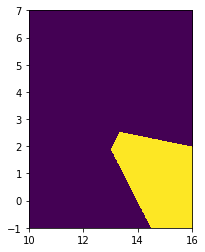

In [8]:
max_x = np.ceil(max(wine_xy[:, 0])) + 1
min_x = np.floor(min(wine_xy[:, 0])) - 1
max_y = np.ceil(max(wine_xy[:, 1])) + 1
min_y = np.floor(min(wine_xy[:, 1])) - 1

xrange = (min_x, max_x)
yrange = (min_y, max_y)

# step size for how finely you want to visualize the decision boundary.
inc = 0.005

# generate grid coordinates. this will be the basis of the decision
# boundary visualization.
(x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

# size of the (x, y) image, which will also be the size of the
# decision boundary image that is used as the plot background.
image_size = x.shape
xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

# distance measure evaluations for each (x,y) pair.
dist_mat_12 = cdist(xy, mean_12)
print mean_12
pred_label_12 = np.argmin(dist_mat_12, axis=1)


dist_mat_13 = cdist(xy, mean_13)
pred_label_13 = np.argmin(dist_mat_13, axis=1)

#print pred_label_12,pred_label_13

dist_mat_23 = cdist(xy, mean_23)
pred_label_23 = np.argmin(dist_mat_23, axis=1)

pred_label_1=pred_label_12&pred_label_13&(~pred_label_23)
pred_label_2=pred_label_12&pred_label_23&(~pred_label_13)
pred_label_3=pred_label_23&pred_label_13&(~pred_label_12)
# reshape the idx (which contains the class label) into an image.
decisionmap_1 = pred_label_1.reshape(image_size, order='F')
decisionmap_2 = pred_label_2.reshape(image_size, order='F')
decisionmap_3 = pred_label_3.reshape(image_size, order='F')

#show the image, give each coordinate a color according to its class label
plt.imshow(decisionmap_1, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')


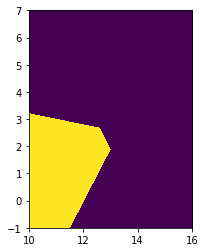

In [9]:
plt.imshow(decisionmap_2, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')


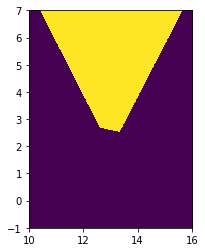

In [10]:

plt.imshow(decisionmap_3, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')


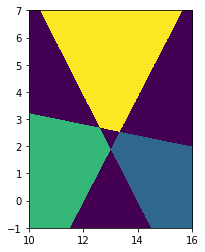

In [11]:
pred_label=np.array([0]*len(pred_label_1))
for i in range(len(pred_label)):
    if pred_label_12[i] and pred_label_13[i] and pred_label_23[i]:
        continue
    elif pred_label_12[i] and pred_label_13[i]:
        pred_label[i]=1
    elif pred_label_12[i] and pred_label_23[i]:
        pred_label[i]=2
    elif pred_label_13[i] and pred_label_23[i]:
        pred_label[i]=3
decisionmap = pred_label.reshape(image_size, order='F')
#show the image, give each coordinate a color according to its class label
plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

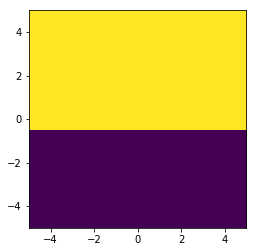

In [12]:
xrange = (-5,5)
yrange = (-5,5)

# step size for how finely you want to visualize the decision boundary.
inc = 0.005

# generate grid coordinates. this will be the basis of the decision
# boundary visualization.
(x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

# size of the (x, y) image, which will also be the size of the
# decision boundary image that is used as the plot background.
image_size = x.shape
xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

# distance measure evaluations for each (x,y) pair.
sample_mean=np.array([[0,-2],[0,1]])
dist_mat = cdist(xy, sample_mean)
pred_label = np.argmin(dist_mat, axis=1)

# reshape the idx (which contains the class label) into an image.
decisionmap = pred_label.reshape(image_size, order='F')

#show the image, give each coordinate a color according to its class label
plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

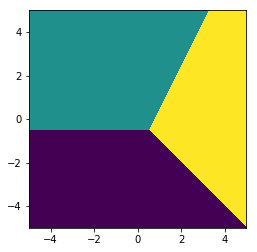

In [13]:
xrange = (-5,5)
yrange = (-5,5)

# step size for how finely you want to visualize the decision boundary.
inc = 0.005

# generate grid coordinates. this will be the basis of the decision
# boundary visualization.
(x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

# size of the (x, y) image, which will also be the size of the
# decision boundary image that is used as the plot background.
image_size = x.shape
xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

# distance measure evaluations for each (x,y) pair.
sample_mean=np.array([[0,-2],[0,1],[2,0]])
dist_mat = cdist(xy, sample_mean)
pred_label = np.argmin(dist_mat, axis=1)

# reshape the idx (which contains the class label) into an image.
decisionmap = pred_label.reshape(image_size, order='F')

#show the image, give each coordinate a color according to its class label
plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')